In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn import svm

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.shape

(10000, 14)

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.duplicated().sum()

0

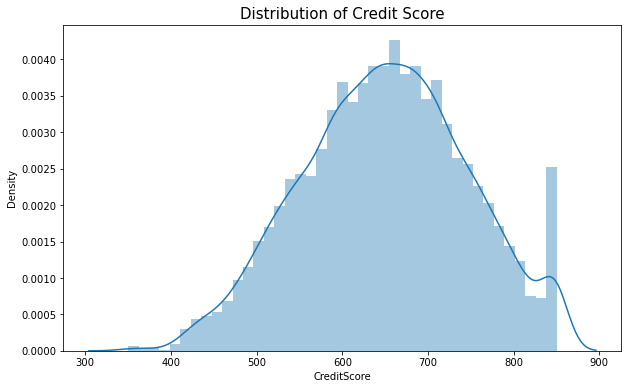

In [8]:
plt.figure(figsize=(10,6))
sns.distplot(df["CreditScore"])
plt.title("Distribution of Credit Score", size=15)
plt.show()

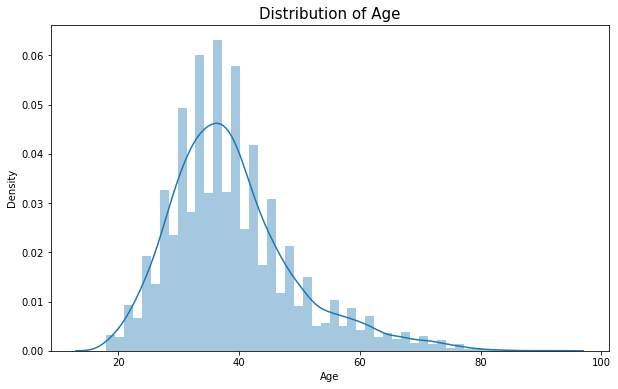

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(df["Age"])
plt.title("Distribution of Age", size=15)
plt.show()

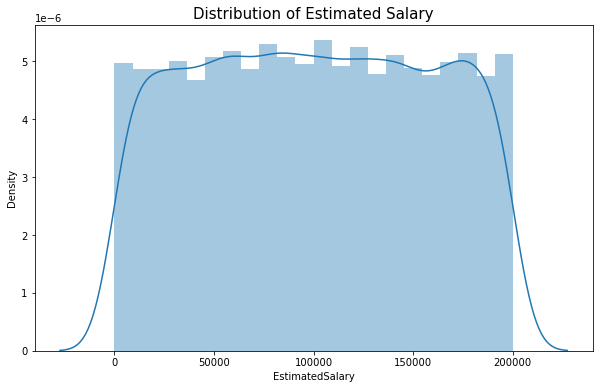

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(df["EstimatedSalary"])
plt.title("Distribution of Estimated Salary", size=15)
plt.show()

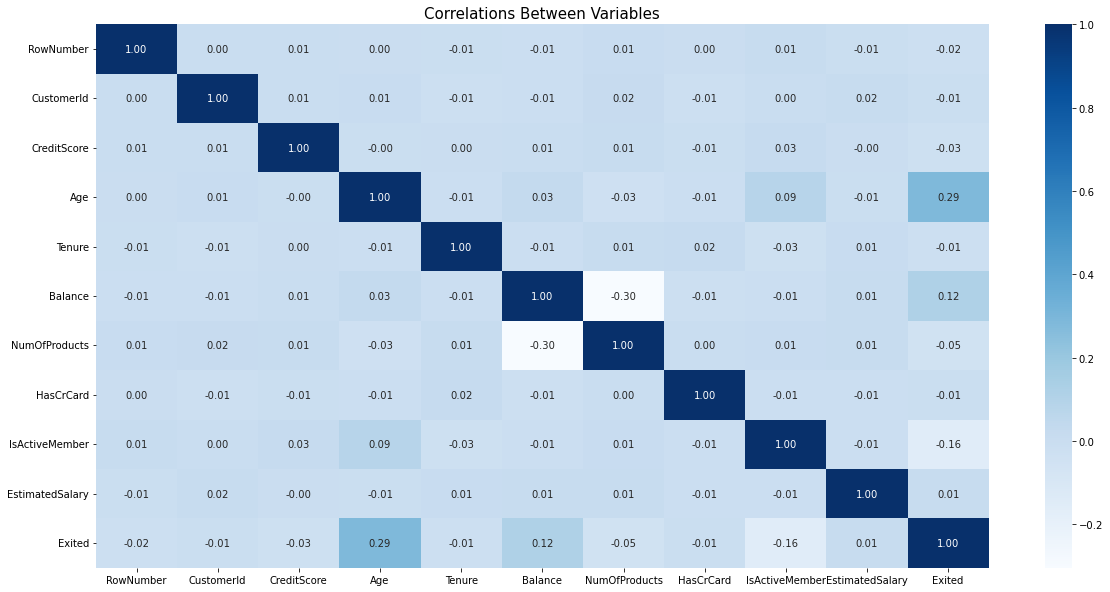

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap="Blues", annot=True, fmt=".2f")
plt.title("Correlations Between Variables", size= 15)
plt.show()

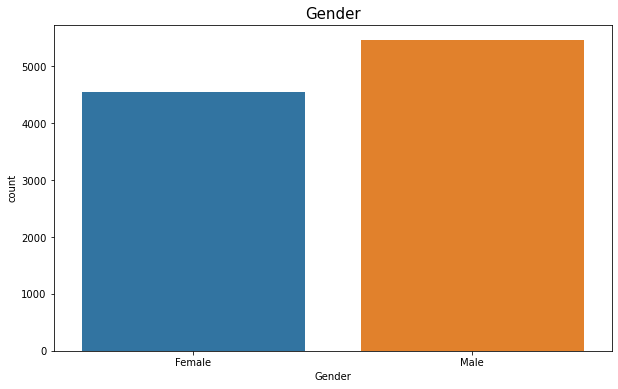

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(df["Gender"])
plt.title("Gender", size=15)
plt.show()

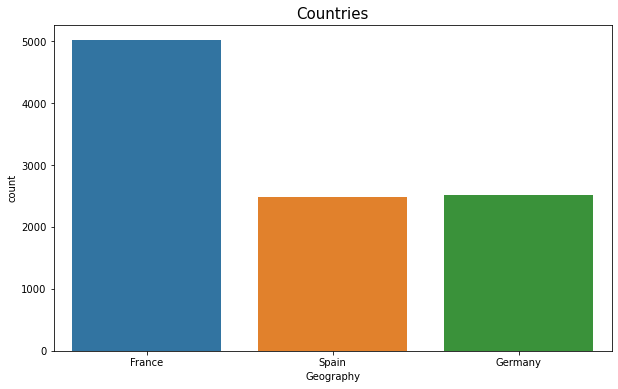

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(df["Geography"])
plt.title("Countries", size=15)
plt.show()

In [14]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


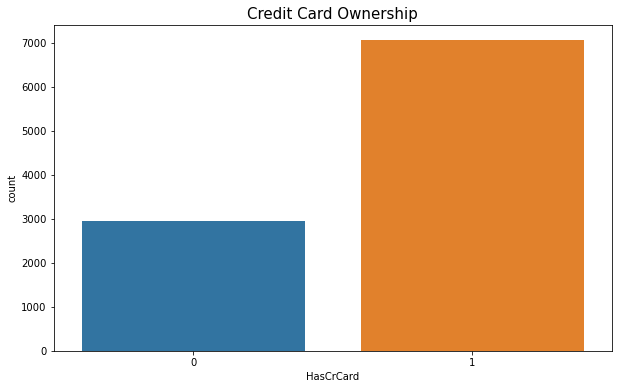

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(df["HasCrCard"])
plt.title("Credit Card Ownership", size=15)
plt.show()

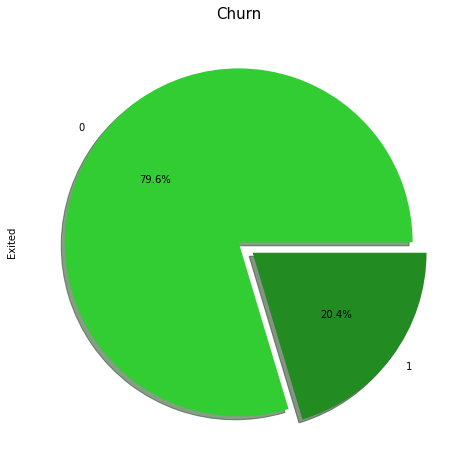

In [16]:
plt.figure(figsize=(14,8))
df["Exited"].value_counts().plot(kind="pie", autopct="%1.1f%%", explode=[0,0.1], shadow=True, colors=["limegreen","forestgreen"])
plt.title("Churn", size = 15)
plt.show()

In [17]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df = df.drop(["RowNumber","CustomerId","Surname"], axis=1)

In [19]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [21]:
X = pd.get_dummies(X, columns=["Geography"])

In [22]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,1


In [23]:
le = LabelEncoder()
X["Gender"] = le.fit_transform(X["Gender"])

In [24]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


## Scaling

In [25]:
scaler = StandardScaler()

In [26]:
X = scaler.fit_transform(X)

## Train Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Modelling

### DecisionTreeClassifier

In [28]:
dtc = DecisionTreeClassifier()

In [29]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
predict_dtc = dtc.predict(X_test)

In [31]:
print(accuracy_score(y_test, predict_dtc))

0.804


In [32]:
cm = confusion_matrix(y_test, predict_dtc)

In [33]:
print(cm)

[[2103  313]
 [ 275  309]]


### Random Forest

In [34]:
rf = RandomForestClassifier()

In [35]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
predict_rf = rf.predict(X_test)

In [37]:
print(accuracy_score(y_test, predict_rf))

0.868


In [38]:
cm = confusion_matrix(y_test, predict_rf)

In [39]:
print(cm)

[[2333   83]
 [ 313  271]]


### Naive Bayes

In [40]:
gnb = GaussianNB()

In [41]:
gnb.fit(X_train, y_train)

GaussianNB()

In [42]:
predict_gnb = gnb.predict(X_test)

In [43]:
print(accuracy_score(y_test, predict_gnb))

0.826


In [44]:
cm = confusion_matrix(y_test, predict_gnb)

In [45]:
print(cm)

[[2254  162]
 [ 360  224]]


### SVM

In [46]:
svc = svm.SVC()

In [47]:
svc.fit(X_train, y_train)

SVC()

In [48]:
predict_svc = svc.predict(X_test)

In [49]:
print(accuracy_score(y_test, predict_svc))

0.8623333333333333


In [50]:
cm = confusion_matrix(y_test, predict_svc)

In [51]:
print(cm)

[[2361   55]
 [ 358  226]]
